# AIMSim Demo
This notebook demonstrates the key uses of _AIMSim_ as a graphical user interface, command line tool, and scripting utility. For detailed explanations and to view the source code for _AIMSim_, visit our [documentation page](https://vlachosgroup.github.io/AIMSim/).

## Installing _AIMSim_
For users with Python already in use on their devices, it is _highly_ recommended to first create a virtual environment before installing _AIMSim_. This package has a large number of dependencies with only a handful of versions supported, so conflicts are likely unless a virtual environment is used.

For new Python users, the authors recommended installing anaconda navigator to manage dependencies for _AIMSim_ and make installation easier overall. Once anaconda navigator is ready, create a new environment with Python 3.7, open a terminal or command prompt in this environment, and follow the instructions below. 

We reccomend installing _AIMSim_ using the commands shown below (omit exclamation points and the %%capture, unless you are running in a Jupyter notebook):

In [4]:
%%capture
!pip install aimsim

Now, start the _AIMSim_ GUI by typing `python -m aimsim` or simply `aimsim` into the command line.

## Graphical User Interface Walkthrough
For most users, the Graphical User Interface (GUI) will provide access to all the key functionalities in _AIMSim_. The GUI works by serving the user with drop downs and text fields which represent settings that would otherwise need to be configured in a file by hand. This file is written to the disk by the GUI as part of execution so that the file can be used as a 'starting point' for more advanced use cases.

**Important Note**: Jupyter Notebook _cannot_ run _AIMSim_ from Binder. In order to actually run the _AIMSim_ GUI alongside this tutorial, you will need to download this notebook and run it from a local installation of Jupyter, or follow the installation instructions above and start _AIMSim_ from there. You can install Jupyter [here](https://jupyter.org/install).
<div>
<img src="attachment:AIMSim-GUI.png" width="500"/>
</div>


### Row 1: Molecule Database Entry
This field accepts a file or directory path containing an input set of molecules in one of the accepted formats: SMILES strings, Protein Data Bank files, and excel files containing these data types.

Example:

`/Users/chemist/Desktop/SMILES_database.smi`

The `Browse...` button can also be used to find files anywhere on your computer using your system's default file explorer.

### Row 2: Molecule Database Checkboxes
#### Database Similarity Plot
Checking this box will generate a similarity distribution with _AIMSim's_ default color scheme and labels. To customize this plot further, edit the configuration file produced by _AIMSim_ by clicking `Open Config`, then re-submit the file through the command line interface.

Example:
<div>
<img src="attachment:image-4.png" width="200"/>
</div>

In addition to the similarity distribution, this will create a heatmap showing pairwise comparisons between the two species. As above, edit the configuration file to control the appearance of this plot.

Example:
<div>
<img src="attachment:image-5.png" width="200"/>
</div>

#### Property Similarity Plot
Like in the previous two examples, checking this box will create a plot showing how a provided molecular property varies according to the chosen molecular fingerprint. For this to work, data must be provided in a comma-separated value format (which can be generated using Excel with Save As... -> CSV) where the rightmost column is a numerical value (the property of interest).

Example:

| SMILES | Boiling Point |
|--------|---------------|
| C      | -161.6        |
| CC     | -89           |
| CCC    | -42           |


### Row 3: Target Molecule Entry
Provide a SMILES string representing a single molecule for comparison to the provided database of molecules. In the screenshot above, the default option is shown (since this field is optional). Any valid SMILES strings are accepted, and any errors in the SMILES string will not affect the execution of other tasks.

As in the Database Entry Field, use the `Browse...` button to find a single molecule in an accepted data format using a file explorer popup window.


### Row 4: Similarity Measure
This dropdown includes all of the similarity metrics currently implemented in _AIMSim_. The default selected metric is likely a great starting point for most users, and the additional metrics are provided for advanced users or more specific use cases. 

Available Similarity Measures are automatically updated according to the fingerprint currently selected. Not all metrics are compatible with all fingerprints, and _AIMSim_ recognizes will only allow the user to select valid combinations.

_AIMSim_ also has the ability to determine which similarity metric is best to represent the data in hand. Selecting `AI Search` will identify said descriptor and use it in subsequent analysis. Similarly, _AIMSim_ can determine which fingerprint best represents the data, though this feature is currently only accessible via the command line (see the specifications file below).

For a complete list of implemented descriptors, run _AIMSim_ locally or check the online documentation [here](https://vlachosgroup.github.io/AIMSim/implemented_metrics.html).


### Row 5: Molecular Descriptor
This dropdown includes all of the molecular descriptors, mainly fingerprints, currently implemented in _AIMSim_:

|#|Fingerprint|
|---|---|
|1|morgan|
|2|topological|
|3|daylight|
|4|minhash|

Each of these fingerprints should be generally applicable for chemical problems, though they are all provided to serve as an easy way to compare the results according to fingerprinting approach.

Additional descriptors are included with _AIMSim_ which are not mathematically compatible with some of the similarity measures. When such a descriptor is selected, the corresponding similarity measure will be removed from the dropdown.

The `Exp. Descriptors` checkbox adds additional molecular descriptors into the `Molecular Descriptor` dropdown. These are marked as _experimental_ because they are generated using third-party libraries over which we have very little or no control. The descriptors generated by these libraries should be used only when the user has a very specific need for a descriptor as implemented in one of the packages below:
 - [ccbmlib](https://doi.org/10.12688/f1000research.22292.2): All molecular fingerprints included in the `ccbmlib` library have been reproduced in _AIMSim_. Read about these fingerprints [in the `ccbmlib` repository](https://github.com/vogt-m/ccbmlib).
 - [mordred](https://doi.org/10.1186/s13321-018-0258-y): All 1000+ descriptors included in `mordred` are available in _AIMSim_, though as of Januray 2022 it seems that `mordred` is no longer being maintained and has a significant amount of bugs. Use at your own risk. (command line only)
 - [PaDELPy](https://doi.org/10.1002/jcc.21707): [This package](https://github.com/ecrl/padelpy) provides access to all of the molecular descriptors included as part of the PaDEL-Descriptor standalone Java program. (command line only)

### Row 6: The Power Buttons
#### Run
Pressing this button will call a number of input checkers to verify that the information entered into the fields above is valid, and then the tasks will be passed into _AIMSim_ for execution. Additional input to _AIMSim_ needed for some tasks may be requested from the command line.

For large collections of molecules with substantial run times, your operating system may report that _AIMSim_ has stopped responding and should be closed. This is likely not the case, and _AIMSim_ is simply executing your requested tasks. If unsure, try checking the `Verbose` checkbox discussed below, which will provide near-constant output while _AIMSim_ is running.

#### Open Config
Using your system's default text editor, this button will open the configuration file generated by _AIMSim_ after pressing the run button. This is useful for fine-tuning your plots or re-running the exact same tasks in the future. This configuration file can also access additional functionality present in _AIMSim_ which is not included in the GUI, such as the sampling ratio for the data (covered in greater depth in the __Command Line and Configuration Files__ section below). To use this configuration file, include the name of the file after your call to _AIMSim_ on the command line, i.e.:

`aimsim aimsim-ui-config.yaml` or `python -m aimsim aimsim-ui-config.yaml`

Because of the way Python install libraries like _AIMSim_, this file will likely be saved somewhere difficult to find among many other internal Python files. It is highly recommended to make a copy of this file in a more readily accessible location, or copy the contents of this file into another one. The name of the file can also be changed to something more meaningful (i.e., JWB-Solvent-Screen-123.yaml) as long as the file extension (.yaml) is still included.

### Row 7: Configuration Checkboxes
### Verbose
Selecting this checkbox will cause _AIMSim_ to emit near-constant updates to the command line on its status during execution. This is useful to confirm that _AIMSim_ is executing and has not crashed, and also to provide additional information about errors in the input data.

For large datasets, this may generate a _significant_ amount of command line output. A pairwise comparison of 10,000 molecules would require 100,000,000 (10,000 \* 10,000) operations, generating at least that many lines of text in the console.

Example __Verbose__ output:

```
Reading SMILES strings from C:\path\to\file\small.smi
Processing O=S(C1=CC=CC=C1)(N2CCOCC2)=O (1/5)
Processing O=S(C1=CC=C(C(C)(C)C)C=C1)(N2CCOCC2)=O (2/5)
Processing O=S(C1=CC=C(C2=CC=CC=C2)C=C1)(N3CCOCC3)=O (3/5)
Processing O=S(C1=CC=C(OC)C=C1)(N2CCOCC2)=O (4/5)
Processing O=S(C1=CC=C(SC)C=C1)(N2CCOCC2)=O (5/5)
Computing similarity of molecule num 1 against 1
Computing similarity of molecule num 2 against 1
Computing similarity of molecule num 3 against 1
Computing similarity of molecule num 4 against 1
Computing similarity of molecule num 5 against 1
Computing similarity of molecule num 1 against 2
```

### Outlier Check
Checking this will have _AIMSim_ create an Isolation Forest (read more about this in [Sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)) to identify possible outliers in the input database of molecules. The results from this approach are _non-deterministic_ because of the underlying algorithm driving the Isolation Forest, so this feature is intended to be a "sanity check" rather than a quantitative measure of 'outlier-ness'. To truly determine how different a single example molecule is to a set of molecules, use the `Compare Target Molecule` functionality discussed above.

### Enable Multiple Workers
This checkbox will enable multiprocessing, speeding up execution time on the data. By default, _AIMSim_ will use __all__ physical cores available on your machine, which may impact performance of other programs.

The user should only enable this option with datasets off a few hundred or more molecules. This is because there is additional processing time associated with creating and destroying multiple processes, so for small data sets it is faster to simply execute the comparisons serially.

## Command Line and Configuration Files
For users who prefer to use _AIMSim_ without a user interface, a command line interface is provided. This requires the user to manually write configuration files, but allows access to more granular control and some additional features which are not included in the GUI. This can be invoked by typing `aimsim config.yaml` into your terminal or command window, where `config.yaml` is a configuration file you have provided or copied from the _AIMSim_ repository.

Below is a 'maximum specification' file to be used with _AIMSim_, showing all possible settings and tasks which _AIMSim_ can ingest. Any overall settings which are left out will be inferred by _AIMSim_, and any tasks which are not included will simply not be executed. Each field used in the file is explained afterward.

### Maximum Specification File
```
is_verbose (bool):
molecule_database (str): # path to excel / csv/ text file
molecule_database_source_type (str):  # Type of source file. 'excel', 'csv', 'text'
similarity_measure (str):  #Set to determine if auto identification required
fingerprint_type (str):  # Set to determine if auto identification required
measure_id_subsample (float):  # [0, 1] Subsample used for measure search
sampling_ratio (float): # [0, 1] Subsample used for all tasks
n_workers (int / str):   # [int, 'auto'] number of processes, or let AIMSim decide
global_random_seed (int / str):  # int or 'random'
    
tasks:
  compare_target_molecule:
    target_molecule_smiles (str):
    draw_molecule (bool):  # If true, strucures of target, most and least similar molecules are displayed
    similarity_plot_settings:
        plot_color (str): # Set a color recognized by matplotlib
        shade (bool): # If true, the similarity density is shaded
        plot_title (str):
    log_file_path (str):
    
  visualize_dataset:
      heatmap_plot_settings:
        cmap (str): # matplotlib recognized cmap (color map) used for heatmap.
        plot_title (str):
        annotate (bool):  # If true, heatmap is annotated
      similarity_plot_settings:
        plot_color (str):
        shade (bool): # If true, the similarity density is shaded
      embedding_plot_settings:
        plot_title (str):
        embedding:
          method (str): # algorithm used for embedding molecule set in 2 dimensions.
          params:  # method specific parameters
            random_state (int): #used for seeding stochastic algorithms
 
  see_property_variation_w_similarity:
    log_file_path (str):
    property_plot_settings:
      plot_color (str):  # Set a color recognized by matplotlib
  
  identify_outliers:  
    random_state (int):
    output (str):  # filepath or "terminal" to control where results are shown
    plot_outliers (bool):
    pair_similarity_plot_settings: # Only meaningful if plot_outliers is True
      plot_color (str): # Set a color recognized by matplotlib
  
  cluster:
    n_clusters (int):
    clustering_method (str):
    log_file_path (str):
    cluster_file_path (str):
    cluster_plot_settings:
      cluster_colors (list): # Ensure len(list) >= n_cluster
    embedding_plot_settings:
      plot_title (str):
      embedding:
        method (str): # algorithm used for embedding molecule set in 2 dimensions.
        params:  # method specific parameters
          random_state (int): #used for seeding stochastic algorithms
```

#### Overall _AIMSim_ Settings
These settings impact how all tasks run by _AIMSim_ will be executed.
 - `is_verbose`: Must be either `True` or `False`. When `True`, _AIMSim_ will emit text updates of during execution to the command line, useful for debugging.
 - `molecule_database`: A file path to an Excel workbook, text file containing SMILES strings, or PDB file surrounded by single quotes, i.e. `'/User/my_user/smiles_database.smi'`. Can also point to a directory containing a group of PDB files, but the file path must end with a '/' (or '\' for Windows).
 - `molecule_database_source_type`: The type of data to be input to _AIMSim_, being either `text`, `excel`, or `pdb`.
 - `similarity_measure`: The similarity measure to be used during all tasks, chosen from the list of supported similarity measures. Automatic similarity measure determination is also supported, and can be performed by specifying `determine`.
 - `fingerprint_type`: The fingerprint type or molecular descriptor to be used during all tasks, chosen from the list of supported descriptors. Automatic determination is also supported, and can be performed by specifying `determine`.
 - `measure_id_subsample`: A decimal number between 0 and 1 specifying what fraction of the dataset to use for automatic determination of similarity measure and fingerprint. For a dataset of 10,000 molecules, setting this to `0.1` would run only 1000 randomly selected molecules, dramatically reducing runtime. This field is only needed if `determine` is used in either of the prior fields.
 - `sampling_ratio`: A decimal number between 0 and 1 specifying what fraction of the dataset to use for tasks. For a dataset of 10,000 molecules, setting this to `0.1` would run only 1000 randomly selected molecules, dramatically reducing runtime.
  - `n_workers`: Either an integer or the string 'auto'. With an integer, _AIMSim_ will create that many processes for its operation. This number should be less than or equal to the number of _physical_ CPU cores in your computer. Set this option to 'auto' to let _AIMSim_ configure multiprocessing for you.
 - `global_random_seed`: Integer to be passed to all non-deterministic functions in _AIMSim_. By default, this value is 42 to ensure consistent results between subsequent executions of _AIMSim_. This seed will override the random seeds provided to any other _AIMSim_ tasks. Alternatively, specify 'random' to allow _AIMSim_ to randomly generate a seed.

#### Task-Specific Settings
The settings fields below dictate the behavior of _AIMSim_ when performing its various tasks.

##### Compare Target Molecule
Generates a similarity distribution for the dataset compared to an individual molecule.
 - `target_molecule_smiles`: SMILES string for the molecule used in comparison to the dataset.
 - `draw_molecule`: If this is set to True, then _AIMSim_ draws the structure of the target molecule, and of the molecule most and least similar to it.
     - `similarity_plot_settings`: Controls the appearance of the distribution.
         - `plot_color`: Can be any color recognized by the _matplotlib_ library.
         - `shade`: `True` or `False`, whether or not to shade in the area under the curve.
         - `plot_title`: String containing text to be written above the plot.
     - `log_file_path`: String specifying a file to write output to for the execution of this task. Useful for debugging.

##### Visualize Dataset
Generates a pairwise comparison matrix for all molecules in the dataset.
 - `heatmap_plot_settings`: Control the appearance of the plot.
     - `cmap`: _matplotlib_ recognized cmap (color map) used for heatmap.
     - `plot_title`: String containing text to be written above the plot.
     - `annotate`: `True` or `False`, controls whether or not _AIMSim_ will write annotations over the heatmap.
 - `similarity_plot_settings`: Controls the appearance of the distribution.
     - `plot_color`: Can be any color recognized by the _matplotlib_ library.
     - `shade`: `True` or `False`, whether or not to shade in the area under the curve.
 
 - `embedding_plot_settings`: Constrols the lower dimensional embedding of the dataset.
     - `plot_title`: String containing text to be written above the plot.
     - `embedding`: Set the algorithmic aspects of the embedding
         - `method`: Label specifying the algorithm embedding the molecule set in 2 dimensions.
         - `params`:  Specific hyperparameters which are passed through to the underlying implementation
             - `random_state`: Number used for seeding stochastic algorithms

##### Property Variation Visualization
Creates a plot of how a given property in the input molecule set varies according to the structural fingerprint chosen.
 - `log_file_path`: String specifying a file to write output to for the execution of this task. Useful for debugging or retrospection.
     - `property_plot_settings`: Control the appearance of the plot.
       - `plot_color`: Any color recognized by the _matplotlib_ library.
  
##### Identify Outliers
Trains an [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) on the input data to check for potential outliers.
 - `random_state`: An integer to pass through to random_state in sklearn. _AIMSim_ sets this to 42 by default.
 - `output`: A string which specifies where the output of the outlier search should go. This can be either a filepath or "terminal" to write the output directly to the terminal.
 - `plot_outliers`: Set this to `True` to generate a 2D plot of which molecules are potential outliers.
 - `pair_similarity_plot_settings`: Only meaningful if plot_outliers is True, allows access to plot settings.
     - `plot_color`: Any color recognized by the _matplotlib_ library.
       
##### Cluster
Use a clustering algorithm to make groups from the database of molecules.
 - `n_clusters`: The number of clusters to group the molecules into.
     - `clustering_method`: Optional string specifying a clustering method implemented in `sklearn`, one of `kmedoids`, `ward`, or `complete_linkage`. `complete_linkage` will be chosen by default if no alternative is provided.
     - `log_file_path`: String specifying a file to write output to for the execution of this task. Useful for debugging.
     - `cluster_file_path`: String specifying a file path where _AIMSim_ will output the result of clustering. Useful for comparing multiple clustering approaches or saving the results of large data sets.
     - `cluster_plot_settings`: Control the appearance of the clustering plot.
       - `cluster_colors`: A list of strings, each of which is a color recognized by _matplotlib_ to use for the clusters. Must specify at least as many colors as there are clusters. Additional colors will be ignored.
     - `embedding_plot_settings`: Constrols the lower dimensional embedding of the dataset.
         - `plot_title`: String containing text to be written above the plot.
         - `embedding`: Set the algorithmic aspects of the embedding
             - `method`: Label specifying the algorithm embedding the clustered molecule set in 2 dimensions.
             - `params`:  Specific hyperparameters which are passed through to the underlying implementation
                 - `random_state`: Number used for seeding stochastic algorithms

## Writing Scripts with _AIMSim_
Advanced users may wish to use _AIMSim_ to create their own descriptors, use the descriptor's provided in _AIMSim_ for something else entirely, or utilize the various similarity scores. Brief explanations for how to access the core functionalities of _AIMSim_ from a Python script are shown below.

### Making Custom Descriptors
Any arbitrary numpy array can be provided as a molecular descriptor, though correct function with the similarity metrics provided with _AIMSim_ is not guaranteed.

In [2]:
from aimsim.ops.descriptor import Descriptor
desc = Descriptor()

With the `Descriptor` class instantiated, one can then call the methods to set the value(s) of the descriptor.

In [14]:
import numpy as np
custom_desc = np.array([1, 2, 3])
desc.set_manually(custom_desc)
desc.numpy_

array([1, 2, 3])

This same function can be achieved by passing in a numpy array for the keyword argument `value` in the constructor for `Descriptor`, as shown below:

In [15]:
desc = Descriptor(custom_desc)
desc.numpy_

array([1, 2, 3])

The above code is useful for individually changing a descriptor for one molecule in a `MoleculeSet` but is obviously not practical for bulk custom descriptors. To assign descriptors for an entire set of molecules at once, instantiate the `MoleculeSet` class and call the `_set_descriptor` method passing in a 2-dimensional numpy array of descriptors.

```
from AIMSim.chemical_datastructures.molecule_set import MoleculeSet
molset = MoleculeSet(
    '/path/to/databse/smiles.txt',
    'text',
    False,
    'tanimoto'
)
molset._set_descriptor([[1, 2, 3], [4, 5, 6]])
```

### Generating Descriptors with _AIMSim_
Because _AIMSim_ is able to generate such a wise variety of molecular fingerprints and descriptors from only the SMILES strings, you may want to avoid re-inventing the wheel and use the descriptors that it generates. There are two general approaches to doing this, and the approach used depends on what other code you already have in place:
 1. If you have only SMILES strings to turn into fingerprints/descriptors, the `Molecule` class should be used to handle generating the molecule object and generating the descriptors.
 2. If you have already created a molecule using `RDKit`, you must provide the existing molecule in your call to the constructor in `Molecule`.
These approaches are covered in this order below.

In [1]:
# with a SMILES string
smiles = "CO"
from aimsim.chemical_datastructures.molecule import Molecule
mol = Molecule(mol_smiles=smiles)
mol.set_descriptor(fingerprint_type="atom-pair_fingerprint")
mol.get_descriptor_val()

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [17]:
# with an RDKit molecule
from rdkit import Chem

mol_graph = Chem.MolFromSmiles(smiles)

mol = Molecule(mol_graph=mol_graph)
mol.set_descriptor(fingerprint_type="mordred:nAtom")
mol.get_descriptor_val()

array([6])

### Acessing _AIMSim_ Similarity Metrics
As of January 2022, _AIMSim_ implements 47 unique similarity metrics for use in comparing two numbers and/or two sets of numbers. These metrics were pulled from a variety of sources, including some original implementations, so it may be of interest to use this code in your own work.

All of the similarity metrics can be accessed through the `SimilarityMeasure` class, as shown below.

In [3]:
from aimsim.ops.similarity_measures import SimilarityMeasure
from rdkit.Chem import MolFromSmiles

sim_mes = SimilarityMeasure("driver-kroeber")
desc_1 = Descriptor()
desc_1.make_fingerprint(
    MolFromSmiles("COC"),
    "morgan_fingerprint",
)
desc_2 = Descriptor()
desc_2.make_fingerprint(
    MolFromSmiles("CCCC"),
    "morgan_fingerprint",
)
out = sim_mes(
    desc_1,
    desc_2,
)
out

0.22360679774997896

A complete list of supported similarity measures and the names by which _AIMSim_ recognizes them is listed in the GUI walkthrough section.

## Using AIMSim Tasks inside custom Python pipelines

In this section we will take a look at using some of the Tasks provided by AIMSim inside custom Python scripts.

### Visualizing a Dataset

First we create the dataset which consists of 100 samples, each containing 3 features. We will first create an Excel file and load that file via _AIMSim_ to visualize it. <b>Note that </b> columns corresponding to sample names or features in the Excel have to be prefixed by <i>'feature_'</i> 


In [8]:
%%capture
!pip install openpyxl  # for using the excel writer

import pandas as pd
from numpy.random import random

n_samples = 100
dataset = {'feature_f1': random(size=n_samples),
          'feature_f2': random(size=n_samples),
          'feature_f3': random(size=n_samples)}
df = pd.DataFrame(dataset)
dataset_file = 'dataset.xlsx'
df.to_excel(dataset_file)


First we load the data into a MoleculeSet object. We use the arbitrary features defined above and L2- similarity to define the similarity in this feature space.

In [10]:
from aimsim.chemical_datastructures import MoleculeSet


# load a MoleculeSet from the file
molecule_set = MoleculeSet(molecule_database_src=dataset_file,
                           molecule_database_src_type='excel',
                           similarity_measure='l2_similarity',
                           is_verbose=False)



Now we visualize it using the VisualizeDataset Task. 
Note that the arguments to the VisualizeDataset constructor are used to edit the plot settings (such as colors and axis labels) as well as the type and parameters of the 2D embedding (here we use PCA to embed the dataset in 2 dimensions). A complete list of the keywords accepted and their default values can be found in the docstring of the constructor in our [documentation page](https://vlachosgroup.github.io/AIMSim/). 

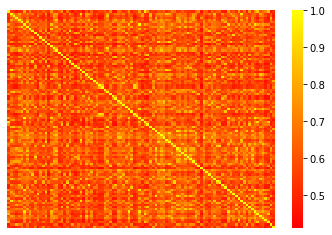

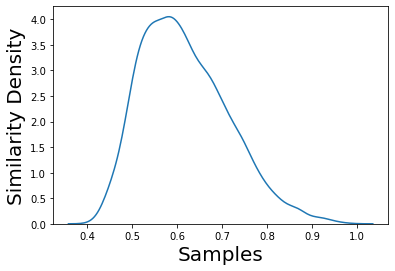

In [11]:
from aimsim.tasks import VisualizeDataset
# instantiate the task
viz = VisualizeDataset(embedding_plot_settings={"embedding": {"method": "pca"}})
viz(molecule_set)

### Clustering

The dataset can also be clustered using the ClusterData Task in _AIMSim_. The following code snippets clusters the dataset using the K-Medoids algorithm. Note that we reuse the MoleculeSet object, therefore we are still using the L2 similarity for clustering. The data is clustered into 5 clusters and the 2D embedding is again generated using PCA. A complete list of the keywords accepted by the ClusterData constructor and their default values can be found in the docstring of the constructor in our [documentation page](https://vlachosgroup.github.io/AIMSim/). 

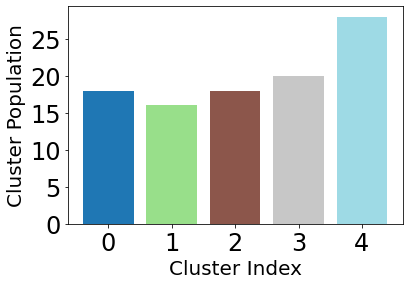

In [13]:
from aimsim.tasks import ClusterData

clustering = ClusterData(n_clusters=5,  # data is clustered into 5 clusters
                         clustering_method='kmedoids',
                         embedding_plot_settings={"embedding": {"method": "pca"}}
                         )
clustering(molecule_set)